In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Reading yield data
df_yield_raw=pd.read_excel('/Users/ruhidmirzayev/Palette/Notebooks/Cohort 7/rm_mb_yield_2004_2023.xlsx')

# Reading Shapely
gdf_rm=gpd.read_file('/Users/ruhidmirzayev/Palette/Notebooks/Cohort 7/MUNICIPALITY.geojson')

# Dropping Unncesseary Columns
df_yield_raw_1=df_yield_raw.drop(columns=['Variety', 'Yield/acre(Metric)', 'Yield/acre(Metric).1', 'Yield/acre(Imperial).1' ])

# Creating new clean yield column
df_yield_raw_1['Yield']=df_yield_raw_1['Yield/acre(Imperial)'].str.replace(' Bushels','')

# Dropping old yield column
df_yield_raw_2=df_yield_raw_1.drop(columns='Yield/acre(Imperial)')

# Removing observations that have not enough values
df_yield_raw_3=df_yield_raw_2.loc[df_yield_raw_2['Farms']!='Below']

# Changing column names
df_yield_raw_3=df_yield_raw_3.rename(columns={'Risk Area / R.M.': 'RM'})
gdf_rm=gdf_rm.rename(columns={'MUNI_LIST_NAME': 'RM'})

## Exploratory Data Analysis

In [8]:
print('Number of RMs in GIS data:',gdf_rm['RM'].nunique())
print('Number of RMs in Yield Data:', df_yield_raw_3['RM'].nunique())

# Joining two tables - GIS/Yield
gdf_rm_join_1=pd.merge(df_yield_raw_3, gdf_rm, on='RM', how='inner')\
    .drop(columns=[ 'OBJECTID', 'MUNI_NO',
       'MUNI_NAME', 'MUNI_TYPE', 'MUNI_LIST_NAME_WITH_TYPE'])

# From DataFrame to GeoDataFrame
gdf_yield=gpd.GeoDataFrame(gdf_rm_join_1)

# Change data type to float or numerical from object
gdf_yield['Yield']=gdf_yield['Yield'].astype(float)

print('Number of RMs after merging: ',gdf_rm_join_1['RM'].nunique() )

Number of RMs in GIS data: 177
Number of RMs in Yield Data: 98
Number of RMs after merging:  80


In [9]:
set(df_yield_raw_3['RM'].unique()) - set(gdf_rm_join_1['RM'].unique())

{'CARTWRIGHT-ROBLIN',
 'DESALABERRY',
 'GILBERT PLAINS',
 'GRANDVIEW',
 'HAMIOTA',
 'HILLSBURG-ROBLIN-SHELL RIVER',
 'KILLARNEY-TURTLE MTN',
 'NORFOLK-TREHERNE',
 'PRAIRIE VIEW',
 'RIVERDALE',
 'ROSSBURN',
 'ST. ANDREWS',
 'ST. CLEMENTS',
 'ST. FRANCIS XAVIER',
 'ST. LAURENT',
 'STE. ANNE',
 'UNORG TERRITORY',
 'WEST ST. PAUL'}

In [10]:
to_replace={
 'HILLSBURG-ROBLIN-SHELL RIVER',
 'KILLARNEY-TURTLE MTN',
 'NORFOLK-TREHERNE',
 'PRAIRIE VIEW',
 'RIVERDALE',
 'ROSSBURN',
 'ST. ANDREWS',
 'ST. CLEMENTS',
 'ST. FRANCIS XAVIER',
 'ST. LAURENT',
 'STE. ANNE',
 'UNORG TERRITORY',
 'WEST ST. PAUL'}

## GIS

In [36]:
gdf_yield.loc[(gdf_yield['Year']==2023) &( gdf_yield['Crop']=='BARLEY')]\
    .explore('Yield', cmap='RdYlGn')

In [38]:
#Function to create and display the map based on crop selection
def create_map(crop):
    # Filter the GeoDataFrame for the selected crop
    filtered_gdf = gdf_yield.loc[(gdf_yield['Year'] == 2023) & (gdf_yield['Crop'] == crop)]
    
    # Use explore() from geopandas to display the filtered GeoDataFrame interactively
    return filtered_gdf.explore(column='Yield', cmap='RdYlGn', legend=True)

# Dropdown widget to select a crop
crop_selector = widgets.Dropdown(
    options=['BARLEY', 'OATS', 'RED SPRING WHEAT', 'ARGENTINE CANOLA'],
    value='BARLEY',
    description='Select Crop:',
)

# Output widget to display the map
output = widgets.Output()

# Function to update the map when a different crop is selected
def update_map(change):
    with output:
        output.clear_output()  # Clear previous map output
        m = create_map(crop_selector.value)  # Generate the new map
        display(m)

# Trigger map update when the dropdown changes
crop_selector.observe(update_map, names='value')

# Display dropdown and initial map
display(crop_selector)
update_map(None)  # Initialize with the first map
display(output)

Dropdown(description='Select Crop:', options=('BARLEY', 'OATS', 'RED SPRING WHEAT', 'ARGENTINE CANOLA'), value…

Output()

In [45]:
# Function to create and display the map based on crop selection
def create_map(crop):
    # Filter the GeoDataFrame for the selected crop and year 2023
    filtered_gdf = gdf_yield.loc[(gdf_yield['Year'] == 2023) & (gdf_yield['Crop'] == crop)]
    
    # Use geopandas' explore() method to display the interactive map
    return filtered_gdf.explore(column='Yield', cmap='RdYlGn', legend=True)

# Output widget to display the map
output = widgets.Output()

# Function to update the map when a button is clicked
def update_map(crop):
    with output:
        output.clear_output()  # Clear previous map output
        m = create_map(crop)  # Generate the new map based on the button clicked
        display(m)

# Create buttons for each crop
barley_button = widgets.Button(description="BARLEY")
oats_button = widgets.Button(description="OATS")
wheat_button = widgets.Button(description="RED SPRING WHEAT")
canola_button = widgets.Button(description="ARGENTINE CANOLA")

# Button click event handlers
barley_button.on_click(lambda b: update_map('BARLEY'))
oats_button.on_click(lambda b: update_map('OATS'))
wheat_button.on_click(lambda b: update_map('RED SPRING WHEAT'))
canola_button.on_click(lambda b: update_map('ARGENTINE CANOLA'))

# Display buttons in a row
button_box = widgets.HBox([barley_button, oats_button, wheat_button, canola_button])

# Display the button box and the output area
display(button_box)
update_map('BARLEY')  # Initialize with the map for 'BARLEY'
display(output)

Output()

<Axes: >

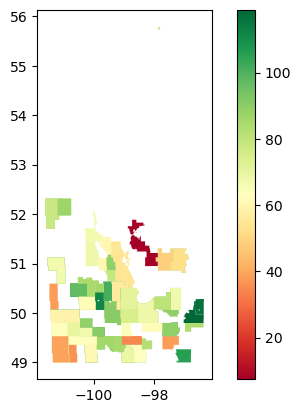

In [40]:
gdf_yield.loc[(gdf_yield['Year']==2023) &( gdf_yield['Crop']=='BARLEY')]\
    .plot('Yield', cmap='RdYlGn', legend=True)

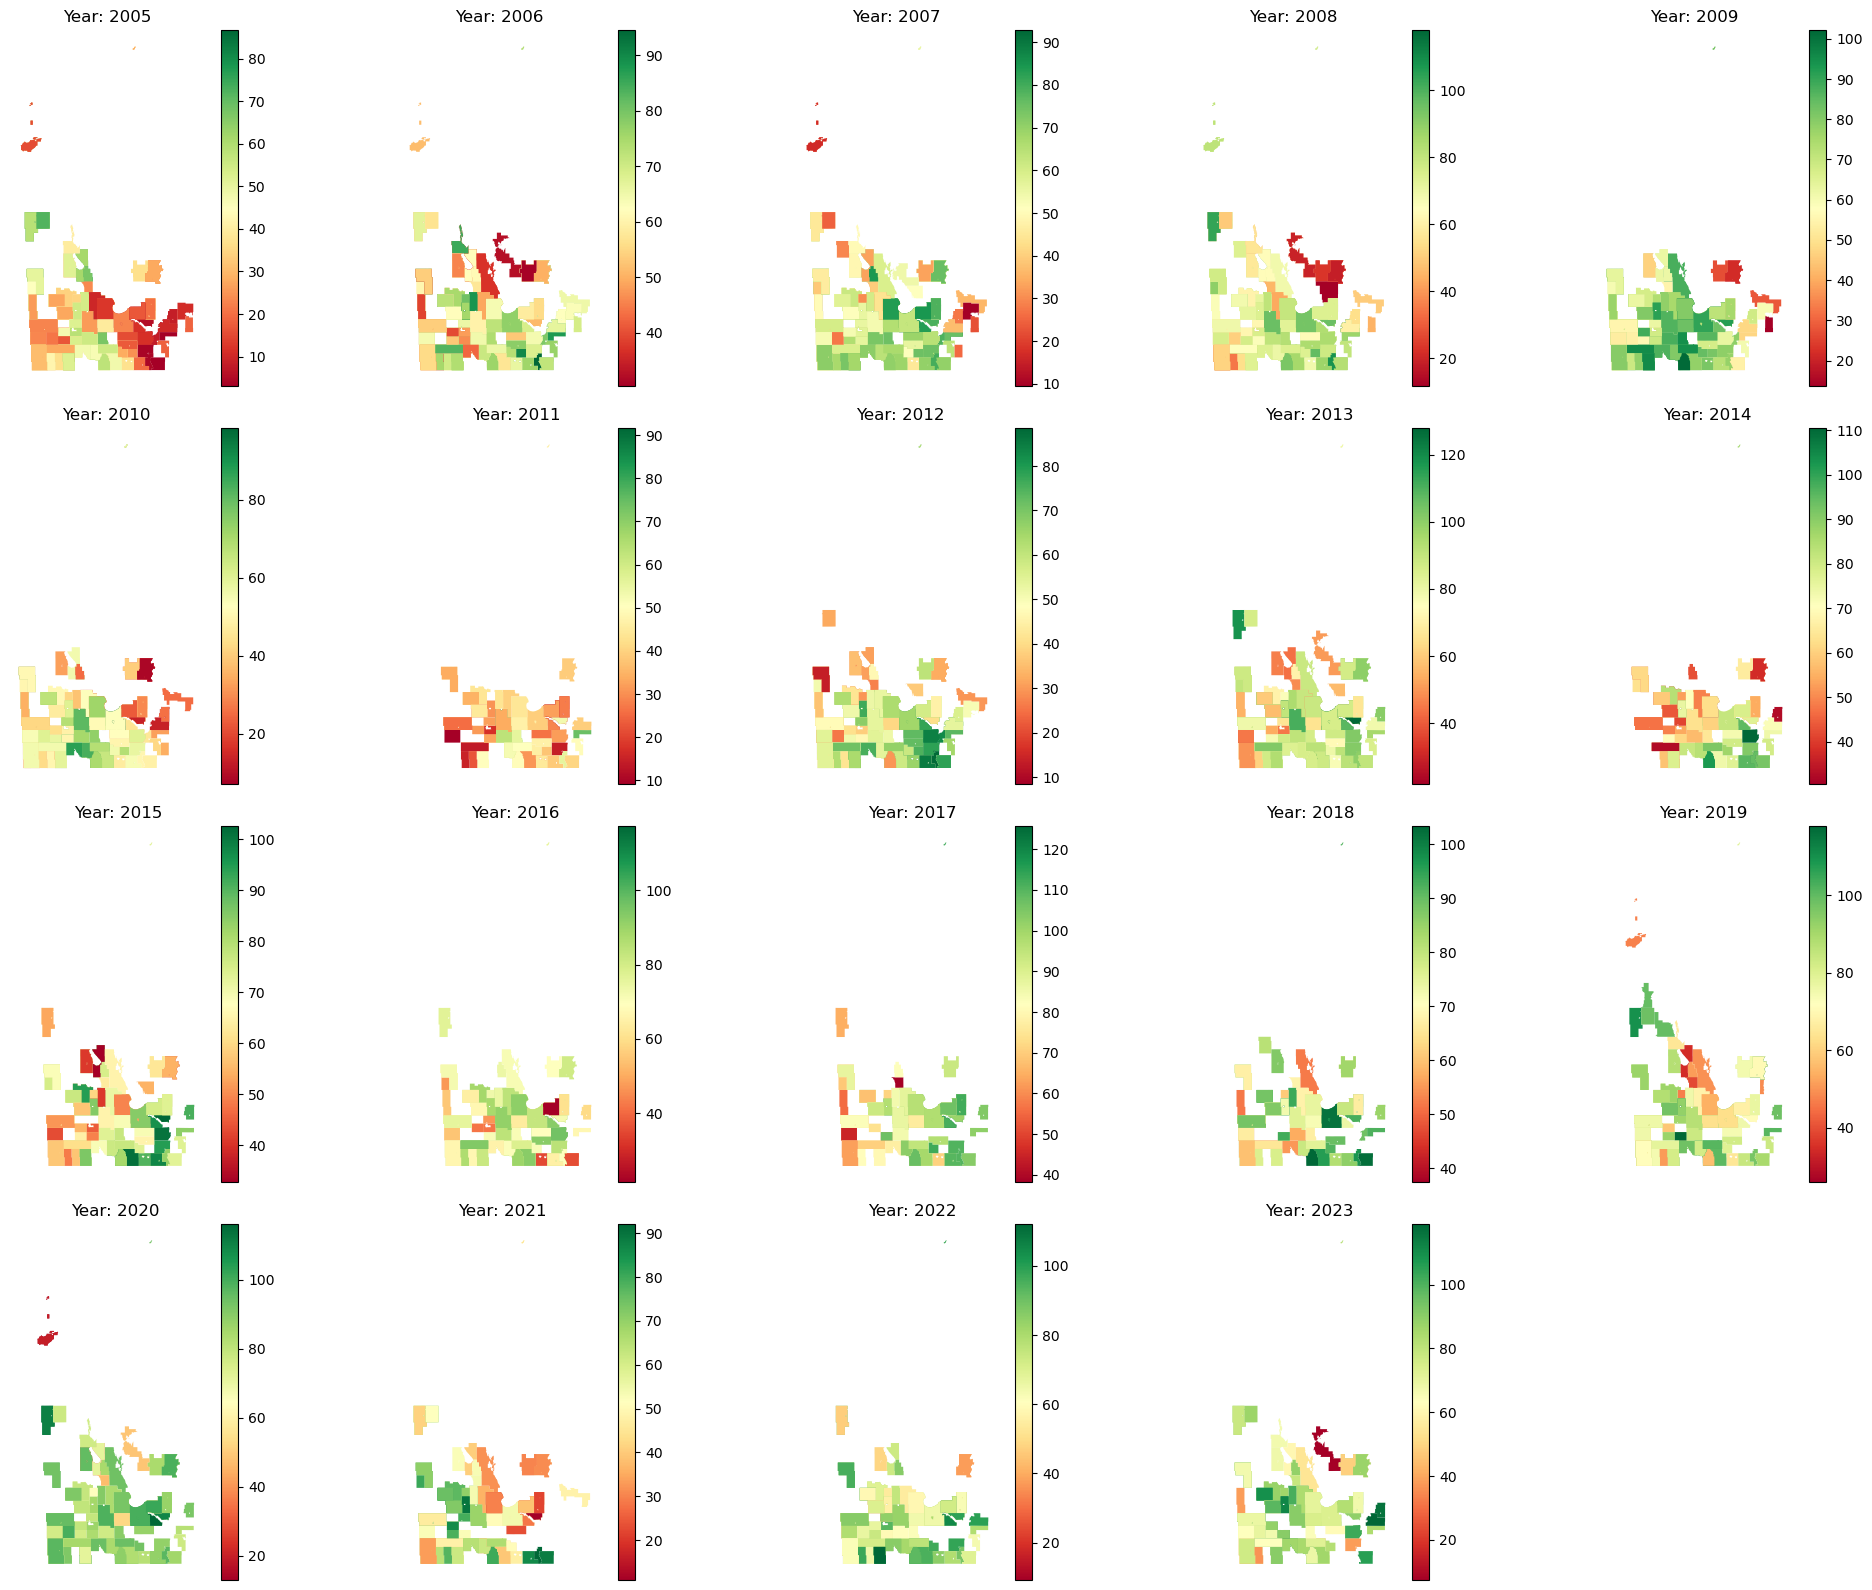

In [44]:
# Filter data for BARLEY from 2005 to 2023
gdf_barley = gdf_yield.loc[(gdf_yield['Crop'] == 'BARLEY') & (gdf_yield['Year'] >= 2005) & (gdf_yield['Year'] <= 2023)]

# Sort by Year to ensure years are ordered
gdf_barley_sorted = gdf_barley.sort_values(by='Year')

# Get the unique years
years = sorted(gdf_barley_sorted['Year'].unique())

# Create a 5x4 grid of subplots (5 columns, 4 rows)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop over the years and plot each year in a subplot
for i, year in enumerate(years):
    if i >= len(axes):  # Stop if we run out of subplots
        break
    # Filter the GeoDataFrame for the specific year
    yearly_data = gdf_barley_sorted[gdf_barley_sorted['Year'] == year]
    
    # Plot the data for the current year in the corresponding subplot
    yearly_data.plot(column='Yield', cmap='RdYlGn', legend=True, ax=axes[i])
    
    # Set the title as the year
    axes[i].set_title(f'Year: {year}')
    axes[i].axis('off')  # Hide axis for clarity

# Remove any unused subplots (if the number of years is less than the total subplots)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()